In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

In [6]:
# Load the Pima Indians Diabetes dataset
print("Loading the Pima Indians Diabetes dataset...")
# Define column names (Kaggle version may not include headers)
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Loading the Pima Indians Diabetes dataset...


In [7]:
# Load the dataset
try:
    # Try loading from local file if available
    df = pd.read_csv(r'C:\Course\Pima Indians Diabetes Dataset\DATA\diabetes.csv')
    print("Dataset loaded successfully from local file.")
except:
    # If file not found, inform user to download
    print("Dataset not found locally. Please download the Pima Indians Diabetes dataset from Kaggle.")
    print("You can download it from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database")
    print("Save the CSV file as 'diabetes.csv' in the same directory as this script.")
    print("For demonstration purposes, we'll attempt to load directly using the URL...")
    try:
        url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
        df = pd.read_csv(url, names=column_names)
        print("Dataset successfully loaded from URL.")
    except:
        print("Could not load from URL. Please download the dataset manually.")
        exit()

Dataset loaded successfully from local file.


In [8]:
# Display basic information about the dataset
print("\n--- Dataset Information ---")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData summary:")
print(df.describe())


--- Dataset Information ---
Dataset shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.79

In [9]:
# Check for missing values
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:
# Check for zeros in columns that shouldn't have zeros
print("\n--- Checking for zeros in important features ---")
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in zero_features:
    zero_count = (df[feature] == 0).sum()
    print(f"{feature}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")


--- Checking for zeros in important features ---
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


In [11]:
# Data preprocessing
print("\n--- Data Preprocessing ---")
print("Handling zeros in important features...")
# Replace zeros with NaN for features that shouldn't have zeros
for feature in zero_features:
    df[feature] = df[feature].replace(0, np.nan)


--- Data Preprocessing ---
Handling zeros in important features...


In [12]:
# Fill NaN values with median of respective columns
for feature in zero_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)
    print(f"Filled {feature} zeros with median: {median_value:.2f}")

Filled Glucose zeros with median: 117.00
Filled BloodPressure zeros with median: 72.00
Filled SkinThickness zeros with median: 29.00
Filled Insulin zeros with median: 125.00
Filled BMI zeros with median: 32.30



--- Correlation Analysis ---
Correlation matrix saved as 'knn_correlation_matrix.png'


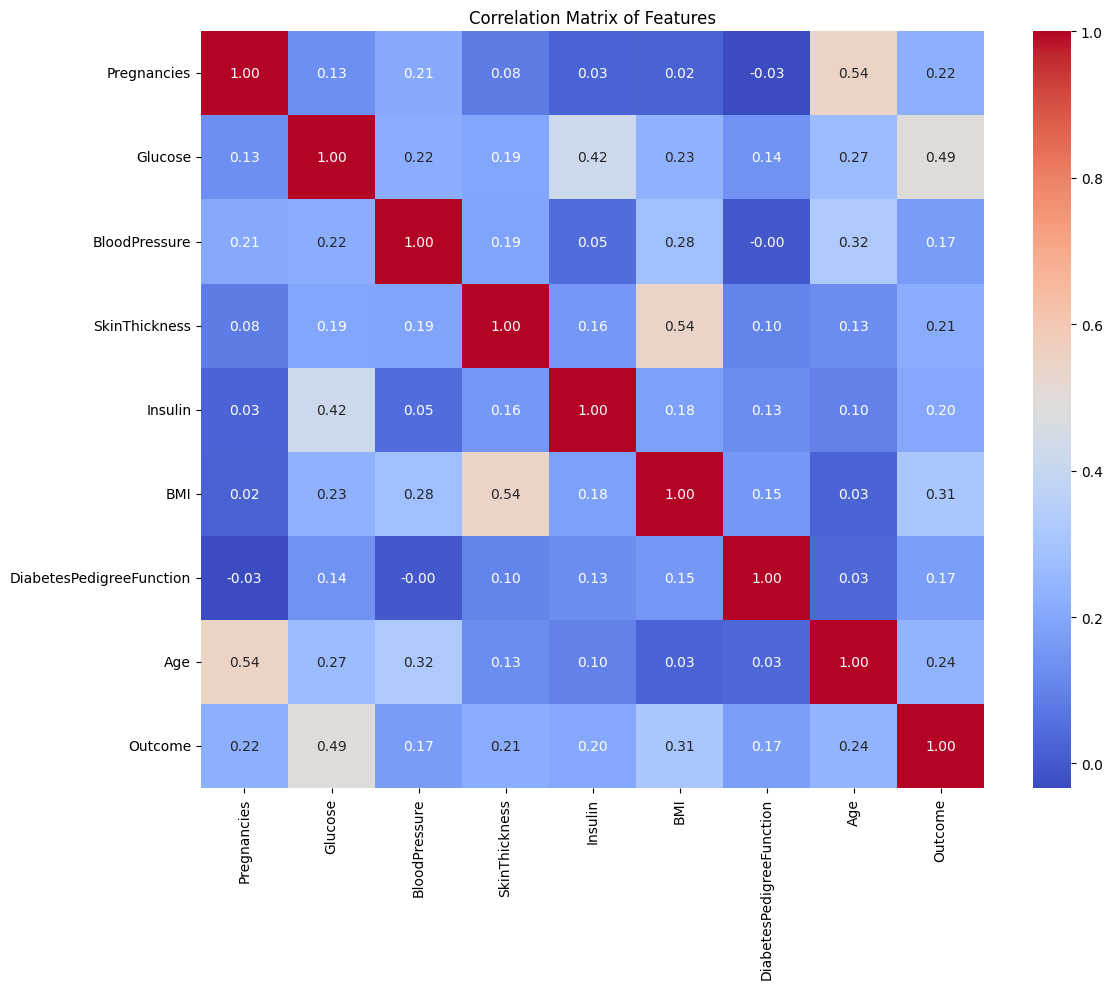

In [13]:
# Correlation analysis
print("\n--- Correlation Analysis ---")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.savefig('knn_correlation_matrix.png')
print("Correlation matrix saved as 'knn_correlation_matrix.png'")


--- Feature Distributions ---
Feature distributions saved as 'knn_feature_distributions.png'


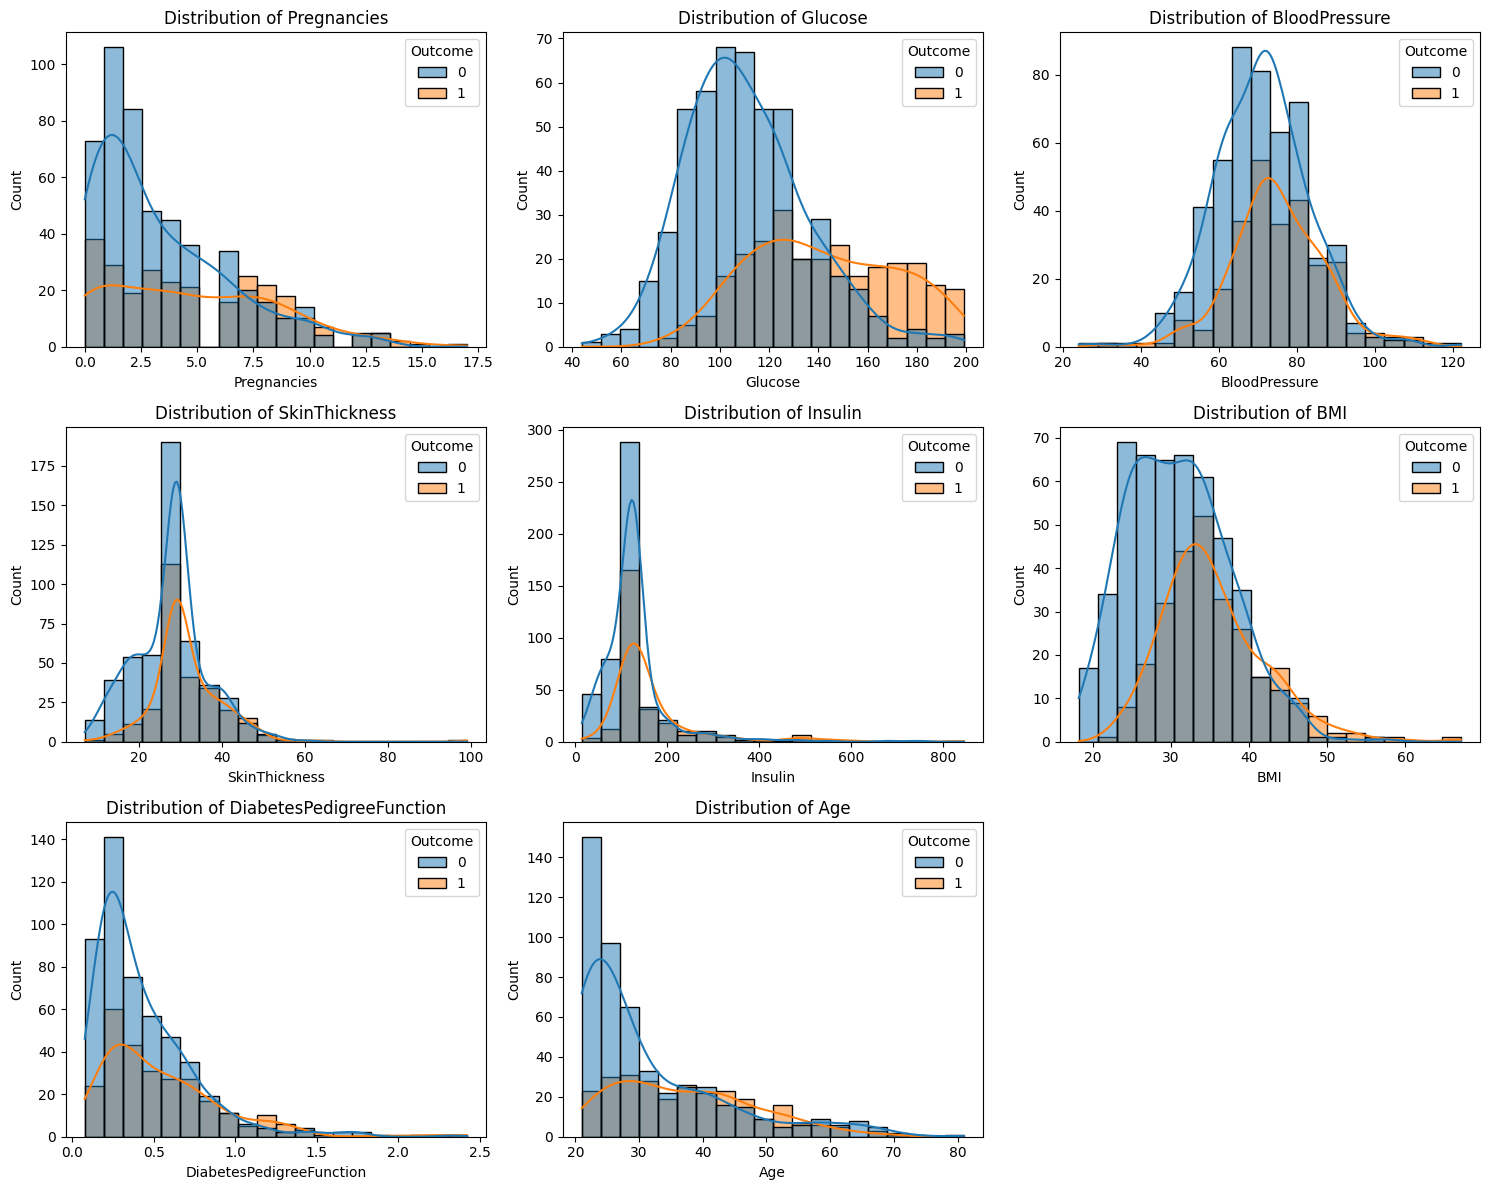

In [14]:
# Feature distribution
print("\n--- Feature Distributions ---")
plt.figure(figsize=(15, 12))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('knn_feature_distributions.png')
print("Feature distributions saved as 'knn_feature_distributions.png'")

In [15]:
# Prepare data for modeling
print("\n--- Preparing Data for Modeling ---")
X = df.drop('Outcome', axis=1)
y = df['Outcome']


--- Preparing Data for Modeling ---


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 614 samples
Testing set: 154 samples


In [17]:
# Build KNN model with preprocessing pipeline
print("\n--- Building KNN Model ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


--- Building KNN Model ---


In [18]:
# Define hyperparameters for grid search
param_grid = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [19]:
# Perform grid search cross-validation
print("Performing grid search to find optimal hyperparameters...")
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Performing grid search to find optimal hyperparameters...
Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [20]:
# Get the best model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"\nBest hyperparameters: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best hyperparameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}
Best cross-validation accuracy: 0.7818


In [21]:
# Evaluate the model on test data
print("\n--- Model Evaluation ---")
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


--- Model Evaluation ---
Test accuracy: 0.7338


In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



Confusion matrix saved as 'knn_confusion_matrix.png'


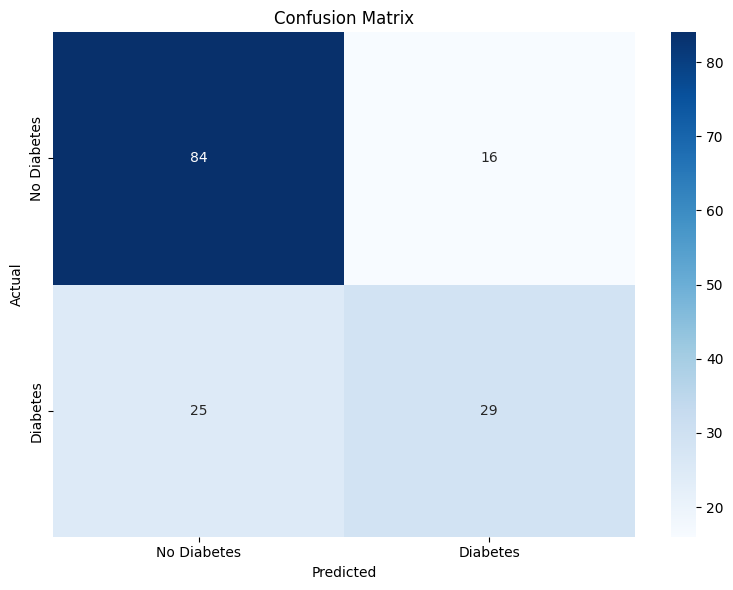

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('knn_confusion_matrix.png')
print("Confusion matrix saved as 'knn_confusion_matrix.png'")


--- ROC Curve Analysis ---
ROC curve saved as 'knn_roc_curve.png'


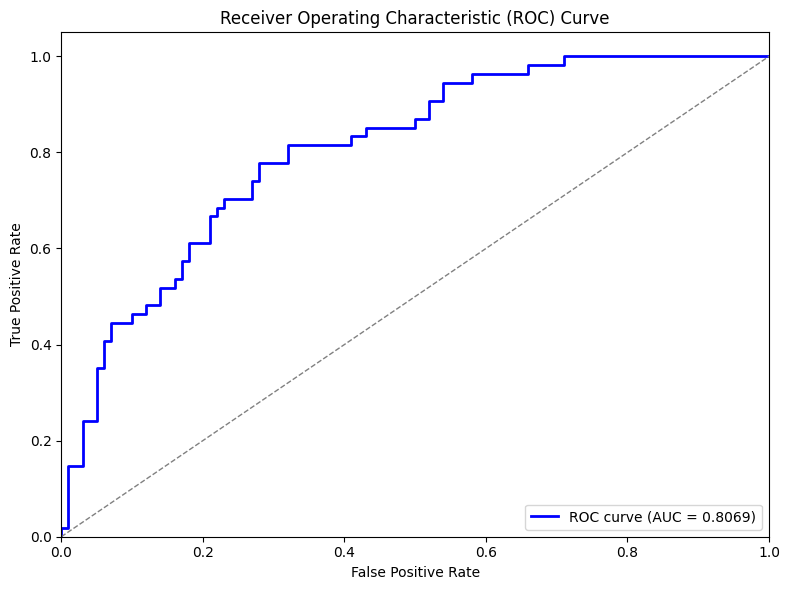

In [24]:
# ROC curve
print("\n--- ROC Curve Analysis ---")
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('knn_roc_curve.png')
print("ROC curve saved as 'knn_roc_curve.png'")

In [ ]:




# K values vs accuracy analysis
print("\n--- K Values vs Accuracy Analysis ---")
k_range = range(1, 31)
k_scores = []

# Create a standardized version of the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    k_scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.title('Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_k_values_accuracy.png')
print("K values vs accuracy plot saved as 'knn_k_values_accuracy.png'")

# Feature importance (based on correlation with target)
print("\n--- Feature Importance Analysis ---")
feature_importance = abs(correlation_matrix['Outcome'].drop('Outcome'))
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette='viridis')
plt.title('Feature Importance (Based on Correlation with Target)')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('knn_feature_importance.png')
print("Feature importance plot saved as 'knn_feature_importance.png'")

print("\n--- KNN Analysis Complete ---")
print("All visualizations have been saved.")
print(f"Final model accuracy: {accuracy:.4f}")
print(f"Best hyperparameters: {best_params}")

# Save the model (optional)
from joblib import dump
dump(best_model, 'knn_diabetes_model.joblib')
print("Model saved as 'knn_diabetes_model.joblib'")